In [1]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install mglearn

     |████████████████████████████████| 540 kB 28.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=9c655d5cd2c13dc1191afed99d070e80deb11fc7fbf9d83e0a656b076bdf902a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


### 구글드라이브 연동

In [3]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt		   ml_class.png		   stock-data.csv
 매수종목2.txt		   pca_1.png		  'stock price.xlsx'
 adult.data		   pca_2.png		  'stock valuation.xlsx'
 auto-mpg.csv		   pca_3.png		   test.db.db
 bmi_500.csv		   Picture1.png		   test.txt
 citibike.csv		   population_number.csv   text.txt
 매수종목.csv		   ram_price.csv	   ThoraricSurgery.csv
 data_mine.csv		   ratings_small.txt	   titanic.xls
 data_population.csv	   ratings_test.txt	   tmdb_5000_credits.csv
 data_studentlist_en.csv   ratings_train.txt	   tmdb_5000_movies.csv
 demo.docx		   sample1.pdf		   Traffic_Accident_2017.csv
 diabetes.csv		   sample2.pdf		   train.csv
 example.docx		   sample.docx		   user_id_mean.csv
 height_weight.txt	   sample_merge.pdf	   wine.csv
 HelloWorld.xlsx	   sample.xlsx		   주가데이터.xlsx
 house_price.csv	   score.csv		   남북한발전전력량.xlsx
 lenna.png		   seoul.html
 little-char.png	   sonar.csv


### 코렙에서 한글 사용

In [4]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# 데이터 표현

- 연속형 특성(continuous feature) : 숫자로 이루어진 순서가 있는 데이터 특성

- 범주형 특성(categorical feature) 또는 이산형 특성(dicrete feature) : 숫자가 아닌 이산적인 데이터 특성
  (컴퓨터, 옷, 책 등)
  
- 데이터의 특성보다 데이터를 어떻게 표현하는가가 머신러닝 모델의 성능에 주는 영향이 큼

-  특성 공학(feature engineering) : 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것
  

## 레이블 인코딩(Label encoding)

- 카테고리 특성을 코드형 숫자 값으로 변환하는 것

- 레이블 결과 값이 문자열로만 있는경우 사용

| 상품구분 | 레이블 인코딩 |
|---|---|
|TV| 0|
|냉장고|1|
|전자렌지|2|
|컴퓨터|3|
|선풍기|4|
|믹서|5|

- 주의 : '01', '02' 코드값 역시 문자열이므로 1, 2와 같은 숫자형 값으로 변환

In [5]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','믹서']

encoder = LabelEncoder()
encoder.fit(items)

encoder.transform(items)

'''
array([0, 1, 4, 5, 3, 2])
트리 구조로 검색 을 사용 
'''

print('인코딩 변환값: ',encoder.transform(items))
print('인코딩 클래스: ',encoder.classes_)
print('인코딩 원본값:',encoder.inverse_transform([5])) #decoding 을 할수 있음

인코딩 변환값:  [0 1 4 5 3 2]
인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
인코딩 원본값: ['컴퓨터']


- 몇몇 머신러닝 알고리즘에는 숫자 값을 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있음  -> 숫자값에 크고 작음에 따른 특성이 작용하는 모델이 있음 ? 

일반적인 원핫 인코딩은 pandas 의 dummies 함수가 좋음 

but 개발을 할떄 사용자의 데이터는 preprocessing  사용하는것이 좋음 
- 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문
- 원-핫-인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식

## 원-핫-인코딩(one-hot-encoding)

- 범주형 변수를 표현하는 데 가장 널리 쓰이는 방법
- 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것

- 예를 들면 과목에 수학, 국어, 과학과 같이 3과목이 특성에 있다면 각각을 (1, 0, 0), (0, 1, 0) (0, 0, 1)과 같이 표현

- pandas나 scikit-learn을 이용하여 범주형 변수를 원-핫 인코딩으로 바꿀 수 있음

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자 값으로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)
# 2차원 데이터로 변화
labels = labels.reshape(-1,1)
print(labels.shape)
# 원-핫-인코딩 적용

encoder_oh  = OneHotEncoder()
encoder_oh.fit(labels)
labels_oh = encoder_oh.transform(labels)
print(labels_oh.shape)
print(labels_oh.toarray())


[0 1 4 5 3 3 2 2]
(8, 1)
(8, 6)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [7]:
# Pandas 원-핫-인코딩
# 숫자형 값으로 변환 없이도 바로 변환 가능
import pandas as pd

df = pd.DataFrame({'items':items})
df

#한번에 one hot encoding 가능 
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 원-핫-인코딩 실습 01

- 데이터는 1994년 인구 조사 데이터베이스에서 추출한 미국 성인 소득 데이터셋

- adult 데이터셋을 사용해 어떤 근로자의 수입이 50,000달라를 초과하는지, 그 이하일지를 예측

- 특성에는 나이, 고용형태, 교육 수준, 성별, 주당 근로시간, 직업 등이 있음

In [8]:
import os
import pandas as pd
import mglearn



# 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정 names 매개변수로 열 이름을 제공
names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

# 실습을 위해 몇개의 열만 선택
select_names=['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']

df =pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH , 'adult.data'),header=None , index_col=False,names = names)

#필요한 부분 에 데이터 만 가져온다
df = df[select_names]
df.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   gender          32561 non-null  object
 4   hours-per-week  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   income          32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


#### 범주형 데이터 문자열 확인하기

In [10]:
df[df['workclass'] == ' ?'].head()

,age,workclass,education,gender,hours-per-week,occupation,income
27,54,?,Some-college,Male,60,?,>50K
61,32,?,7th-8th,Male,40,?,<=50K
69,25,?,Some-college,Male,40,?,<=50K
77,67,?,10th,Male,2,?,<=50K
106,17,?,10th,Female,32,?,<=50K


In [11]:
# 열의 내용을 확인하기 위해 유일한 값이 각각 몇 번 나타나는지 출력
df['workclass'].value_counts()
df['education'].value_counts()
df['gender'].value_counts()
df['occupation'].value_counts()
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

- 성별의 경우 Male, Female로 잘 나누어져있고, 정확하게 두 가지 값을 가지고 있어서 원-핫-인코딩으로 나타내기 좋은 형태
- 모든 열을 살펴보고 그 값들의 확인이 필요

In [12]:
# 원 핫 인코딩 수행
df_dummies =pd.get_dummies(df)

df_dummies.head().T


,0,1,2,3,4
age,39,50,38,53,28
hours-per-week,40,13,40,40,40
workclass_ ?,0,0,0,0,0
workclass_ Federal-gov,0,0,0,0,0
workclass_ Local-gov,0,0,0,0,0
workclass_ Never-worked,0,0,0,0,0
workclass_ Private,0,0,1,1,1
workclass_ Self-emp-inc,0,0,0,0,0
workclass_ Self-emp-not-inc,0,1,0,0,0
workclass_ State-gov,1,0,0,0,0


In [13]:
# 특성과 라벨을 분리
# income으로 시작하는 두 열에 인코딩된 라벨을 분리
features = df_dummies.loc[:,'age':'occupation_ Transport-moving']
x = features.values
y = df_dummies['income_ >50K'].values

x.shape,y.shape

((32561, 44), (32561,))

In [14]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#원핫 인코딩은  train test split 하기전에 끝내라 
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)
model = LogisticRegression().fit(train_x,train_y)
model.score(test_x,test_y)

0.8067804937968308

- 훈련 데이터와 테스트 데이터를 모두 담고 있는 DataFrame을 사용해 원-핫-인코딩을 하는 이유
- 훈련 세트와 테스트 세트에 범주형 값이 같은 방식으로 표현되어야 하기 때문
tv  가 훈련세트에는 있는데 테스트 셋 에 없으면 에러가남 

- 각각 가지고 있는 범주형 값에 따라 특성의 개수가 달라지는 경우가 발생

#### 숫자로 표현된 범주형 특성

- 저장 공간을 위하여 범주형 변수가 숫자로 된 경우가 많음 (남자 : 1, 여자 : 0) -> 연속형으로 다뤄야 할지 범주형으로 다뤄야 할지 어려울 수 있음

- 영화 관람 등급의 경우에는 범주형이지만 순서를 가지고 있고, 영화 별점의 경우에는 별 개수에 따라 연속형으로 나타낼 수도 있고, 범주형으로 나타낼 수도 있음.

- 풀려는 문제나 데이터 그리고 어떤 머신러닝 알고리즘을 사용할지에 따라 선택

In [15]:
df=  pd.DataFrame({'숫자특성':[0,1,2,1],'범주형특성':['양말','여우','양말','우산']})
df.info()

pd.get_dummies(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   숫자특성    4 non-null      int64 
 1   범주형특성   4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


,숫자특성,범주형특성_양말,범주형특성_여우,범주형특성_우산
0,0,1,0,0
1,1,0,1,0
2,2,1,0,0
3,1,0,0,1


- get_dummies 함수는 숫자 특성은 모두 연속형이라고 생각해서 가변수를 만들지 않음

#### 숫자로 표현된 범주형 특성의 원핫 인코딩

- 숫자를 문자로 변환 한 후에 원핫 인코딩
```
demo_df['숫자'] = demo_df['숫자'].astype(str)
pd.get_dummies(demo_df, columns=['숫자'])
```

In [16]:
df['숫자특성'] = df['숫자특성'].astype(str)
pd.get_dummies(df)

,숫자특성_0,숫자특성_1,숫자특성_2,범주형특성_양말,범주형특성_여우,범주형특성_우산
0,1,0,0,1,0,0
1,0,1,0,0,1,0
2,0,0,1,1,0,0
3,0,1,0,0,0,1


## 피처 스케일링(feature scaling)

- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

- 데이터의 스케일에 매우 민감한 머신러닝 알고리즘이 존재 (SVM, 신경망 등)

- 표준화(Standardization) : 데이터의 특성 각각이 평균은 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것  -> 위치를 이동한다고 보면 됨

- 정규화(Normalization) : 서로 다른 특성의 크기를 통일하기 위해 크기를 변환해주는 것 -> 각각의 특성 별로 이상치 나 결측치 가 있는경우를 변경

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


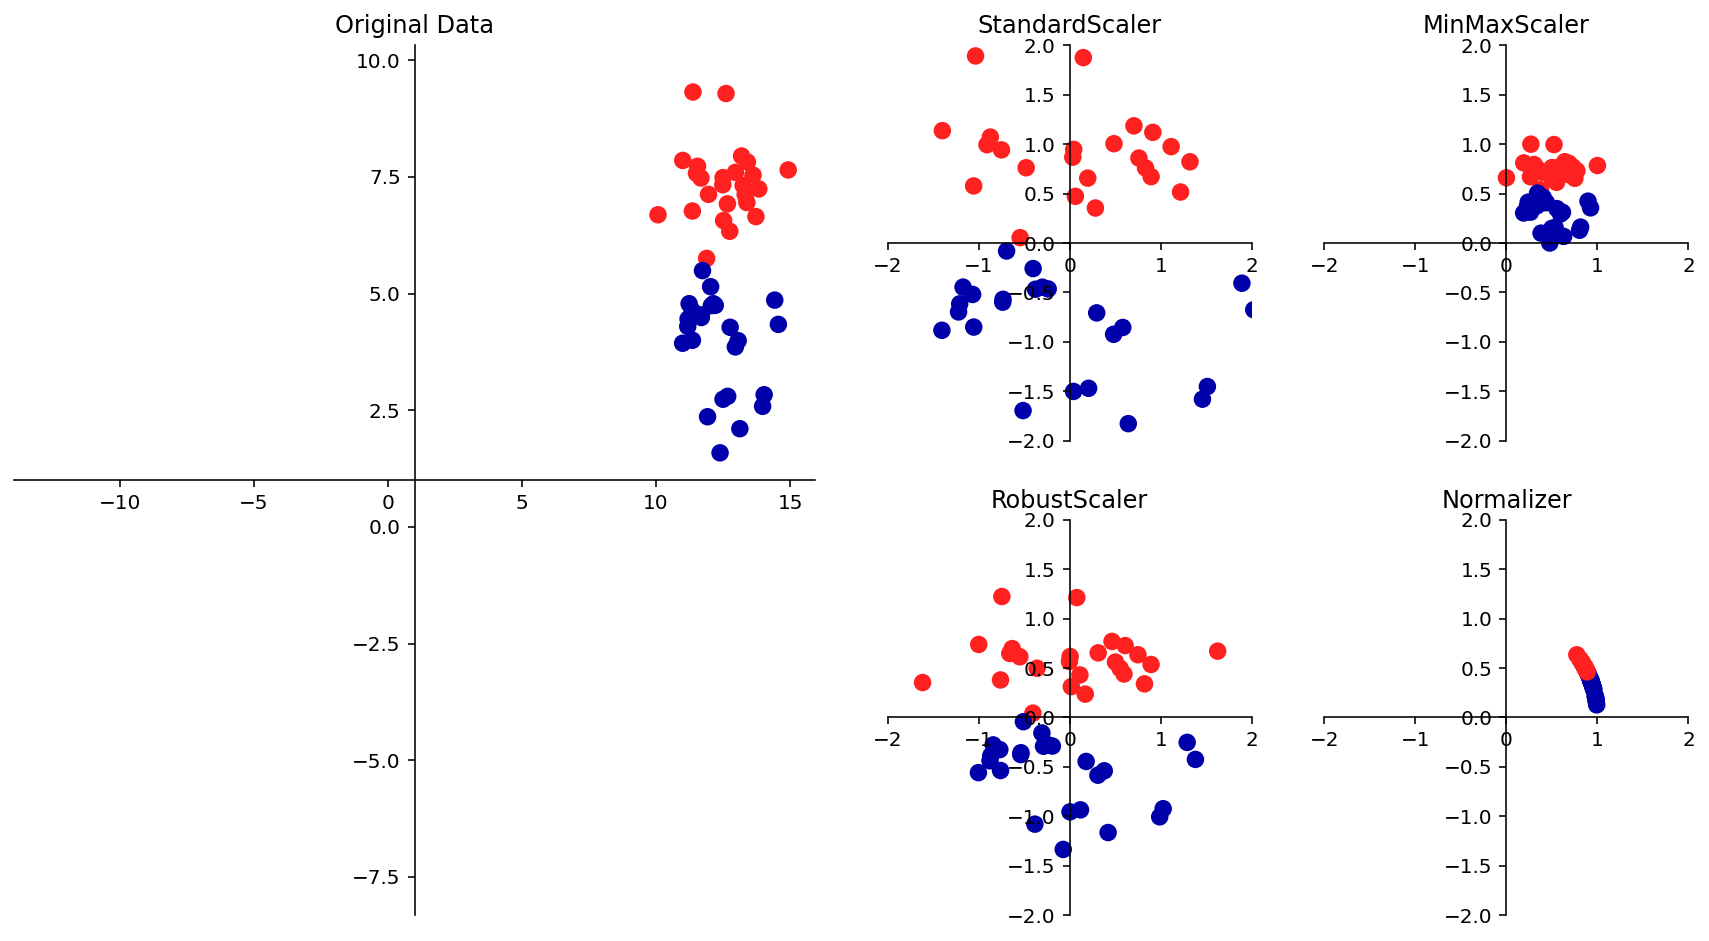

In [17]:
# 데이터셋의 스케일을 조정하거나 전처리하는 여러 방법
mglearn.plots.plot_scaling()

### StandardScaler

- 표준화를 쉽게 지원하기 위한 클래스
- 평균이 0이고, 분산이 1인 값으로 변환

- 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되었기에 표준화 적용이 필요

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()


train_x,test_x,train_y,test_y = train_test_split(cancer.data,cancer.target,random_state = 0)



In [19]:
from sklearn.svm import SVC
model = SVC(C = 100).fit(train_x,train_y) #맨처음에는 아무짓도 안하고 적용 / 이후에 gridsearch 나 parameter튜닝 을 적용 
model.score(test_x,test_y)

0.9440559440559441

In [20]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler

# 주의 : 변환을 위한 기준 정보 설정
# 학습 데이터와 테스트 데이터의 스케일링 기준 정보를 동일하게 유지
scaler = StandardScaler()
scaler.fit(train_x) # 학습 데이터로 적용해야 하는 이유 : test 데이터나 새로운 데이터 를 적용했을때 동일한 조건을 줘야 하기 때문에 

train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

# 조정된 데이터로 SVM 학습
# 스케일 조정된 테스트 세트의 정확도

model_s = SVC(C=100).fit(train_x_scaled,train_y)
model_s.score(test_x_scaled,test_y)

0.958041958041958

In [21]:
import pandas as pd
df = pd.DataFrame(train_x_scaled)
print("특성들의 평균 값: \n", df.mean() )
print("특성들의 분산 값: \n", df.var() )

특성들의 평균 값: 
 0    -3.385138e-15
1    -1.095107e-15
2     4.192786e-15
3    -1.504274e-15
4    -2.205461e-15
5    -3.778032e-16
6     1.139673e-15
7     4.940623e-16
8    -4.089061e-15
9    -2.028372e-15
10    2.183960e-16
11   -3.189937e-16
12    2.861561e-16
13   -6.489332e-17
14    2.701282e-15
15   -4.259764e-16
16    3.020536e-16
17    3.925524e-16
18    3.406248e-16
19    1.284184e-15
20   -7.557856e-17
21   -6.515393e-17
22   -1.223070e-15
23   -2.658280e-17
24    4.438644e-15
25   -1.110229e-15
26   -5.054642e-16
27    1.107617e-17
28   -2.450830e-15
29    2.719395e-15
dtype: float64
특성들의 분산 값: 
 0     1.002353
1     1.002353
2     1.002353
3     1.002353
4     1.002353
5     1.002353
6     1.002353
7     1.002353
8     1.002353
9     1.002353
10    1.002353
11    1.002353
12    1.002353
13    1.002353
14    1.002353
15    1.002353
16    1.002353
17    1.002353
18    1.002353
19    1.002353
20    1.002353
21    1.002353
22    1.002353
23    1.002353
24    1.002353
25    1.002353

- 특성의 평균이 0에 아주 가까운 값으로, 분산은 1에 아주 가까운 값으로 변환

### MinMaxScaler

- 정규화를 쉽게 지원하기 위한 클래스
- 데이터값을 0과 1사이의 범위 값으로 변환


In [22]:
from sklearn.preprocessing import MinMaxScaler

# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(train_x)

train_x_mms = scaler.transform(train_x)
test_x_mms = scaler.transform(test_x)
# 조정된 데이터로 SVM 학습
# 스케일 조정된 테스트 세트의 정확도

model_mms = SVC(C = 100).fit(train_x_mms,train_y)
model_mms.score(test_x_mms,test_y)

0.965034965034965

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.650799,-0.430573,-0.680248,-0.626983,-0.913819,-0.933352,-0.787631,-0.679444,0.254041,-0.798772,-0.689589,0.047238,-0.780363,-0.553374,0.215464,-0.594503,-0.559643,-0.528893,-0.307186,-0.734142,-0.666144,0.018492,-0.681179,-0.631501,0.191962,-0.507751,-0.695929,-0.364339,0.323499,-0.757849
1,-0.828353,0.152265,-0.827738,-0.753094,0.652812,-0.708753,-1.066546,-1.071909,0.489037,-0.341454,-0.373723,1.381566,-0.428297,-0.434922,2.090910,-0.828105,-0.904196,-1.140327,2.684419,-0.666009,-0.887045,0.023445,-0.900486,-0.771001,0.432101,-1.029169,-1.292774,-1.450367,0.625631,-1.030714
2,1.682772,2.189772,1.600098,1.673839,0.103624,-0.005326,0.705766,1.257731,-0.190645,-1.064688,1.257556,2.292502,1.147018,1.204005,-0.431290,-0.050023,0.248337,0.859912,-0.177807,-0.462371,1.508098,2.082033,1.401345,1.439992,-0.694368,-0.399657,0.262556,0.725046,-0.513298,-0.966014
3,-0.160411,-0.338290,-0.241878,-0.239207,-1.220208,-1.247434,-0.875740,-0.948189,-0.837790,-1.083682,-0.511784,-0.084728,-0.562325,-0.381268,-1.149591,-1.168242,-0.670111,-1.127289,-0.854000,-0.984597,-0.167070,0.076272,-0.252000,-0.253640,-1.200842,-1.164088,-0.825141,-0.967772,-0.888195,-1.176430
4,0.713269,0.234834,0.612740,0.553289,-1.546108,-0.642973,-0.665094,-0.672481,0.149196,-1.368593,-0.549088,-1.180967,-0.517649,-0.366203,-1.529993,-0.626358,-0.556141,-1.084449,-0.100911,-0.766115,0.585631,0.152210,0.584842,0.335264,-1.379854,0.258130,-0.109936,-0.425826,2.816487,-0.411282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.310754,0.181407,1.178115,1.232174,-0.515658,-0.885548,-0.107748,0.239495,-0.920942,-1.849288,-0.266691,-0.704238,-0.232111,-0.081630,0.206964,-0.822206,-0.174117,0.495863,-0.138748,-0.775250,0.745170,-0.220878,0.634952,0.594798,-0.358173,-0.901896,-0.244699,0.215446,-0.521207,-1.472362
422,-0.478881,1.167376,-0.334878,-0.506984,1.606665,2.685120,1.767924,0.935857,0.814417,2.894839,-0.373723,0.708904,-0.389448,-0.345773,0.057495,2.777969,1.455849,0.443372,-0.310848,2.423574,-0.250931,2.483186,-0.289140,-0.300937,2.305182,5.306877,4.217126,1.613032,2.324533,6.974084
423,-1.331142,-0.221723,-1.324284,-1.055037,0.327635,-0.871325,-0.784826,-0.904859,-1.080017,1.018812,0.359463,0.063734,0.206879,-0.210813,-0.053367,-0.949507,-0.261664,-0.869745,-0.124102,-0.380536,-0.878864,-0.102018,-0.933499,-0.765025,0.034781,-0.975056,-0.782743,-0.988065,-0.699955,-0.122663
424,-1.251102,-0.246008,-1.287002,-1.028648,-1.941379,-1.584827,-1.130378,-1.267483,-0.548563,0.270739,-0.177440,6.731709,-0.296697,-0.392205,-1.867892,-1.081999,-1.009157,-1.981365,2.142488,-0.770683,-1.298576,-0.793717,-1.332613,-0.996898,-2.677913,-1.486588,-1.360156,-1.758873,-1.562061,-1.009897


In [24]:
# 특성들의 최소값
# 특성들의 최대값

import pandas as pd
df = pd.DataFrame(train_x_mms)
print("특성들의 평균 값: \n", df.mean() )
print("특성들의 분산 값: \n", df.var() )
print("특성들의 최대 값: \n", df.max() )
print("특성들의 최소 값: \n", df.min() )

특성들의 평균 값: 
 0     0.339731
1     0.395145
2     0.334143
3     0.218416
4     0.475030
5     0.288643
6     0.207709
7     0.244255
8     0.376127
9     0.266575
10    0.106209
11    0.187835
12    0.098194
13    0.062560
14    0.243960
15    0.219169
16    0.080049
17    0.221662
18    0.234327
19    0.097355
20    0.298357
21    0.362953
22    0.284123
23    0.172643
24    0.405028
25    0.218826
26    0.215241
27    0.397104
28    0.262467
29    0.186936
dtype: float64
특성들의 분산 값: 
 0     0.028267
1     0.029263
2     0.028517
3     0.023374
4     0.022645
5     0.030123
6     0.033844
7     0.037224
8     0.019561
9     0.020828
10    0.010814
11    0.014590
12    0.009437
13    0.008224
14    0.017098
15    0.026556
16    0.006307
17    0.012545
18    0.023438
19    0.008258
20    0.030321
21    0.026127
22    0.028614
23    0.020768
24    0.022930
25    0.021719
26    0.025101
27    0.051093
28    0.015565
29    0.013624
dtype: float64
특성들의 최대 값: 
 0     1.0
1     1.0
2     1.0
3

# 특성 공학(feature engineering)

- 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것

  - 나이 -> 카테고리(아동,청소년,중장년,노인) 연속형 데이터를 범주형으로 만들기 

   
  - 시계월 -> 일, 월 ,주  (이상치 데이터로 바꾼다) 

- 데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다름

 - 구간분할(bining) : 한 특성을 여러 특성으로 나누는 것 (이산화)


```
from sklearn.preprocessing import KBinsDiscretizer #구간 분할 라이브러리 
```


 - 용량이 매우 크고 고차원 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할이 모델 성능을 높이는데 도움이 됨

- 원본 데이터에 상호작용(interaction)과 다항식(polyonmial) 특성을 추가

  특성과 특성끼리 곱하거나 제곱하여 특성을 추가하는 방식
   

## 특성 자동 선택

- 특성이 추가되면 모델이 복잡해지고 과대적합 가능성이 올라감

- 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋음.

- 특성 선택 방법 : 일변량 통계, 모델 기반 선택, 
반복적 선택(특성을 하나씩 하나씩 추가하는 방식이다/ 매우 느림)


### 일변량 통계(univariate statistics)

- 특성과 타켓 사이에 중요한 통계적 관계가 있는지 계산하고 깊게 관련된 것만 선택

In [25]:
# 의미 없는 노이즈 특성을 추가하고, 식별해서 제거하는지 확인
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

cancer = load_breast_cancer() #특성 30개의 데이터  + 노이즈 특성 50개를 추가할것이다 

# 고정된 난수를 발생
rn =  np.random.RandomState(42)
noise = rn.normal(size = [len(cancer.data), 50])
#noise.shape
# 데이터에 노이즈 특성을 추가
# 처음 30개는 원본 특성이고 다음 50개는 노이즈
noise_x = np.hstack([cancer.data,noise])
train_x,test_x,train_y,test_y = train_test_split(noise_x , cancer.target,random_state = 0 ,test_size = 0.5)
#noise_x.shape
# SelectPercentile을 사용하여 특성의 50%를 선택
select = SelectPercentile(percentile=50) #특성을 선택하는데 필요한 클래스 score fun : 분류 -> f_classif / 회귀 :  
select.fit(train_x,train_y)
train_x_select = select.transform(train_x)


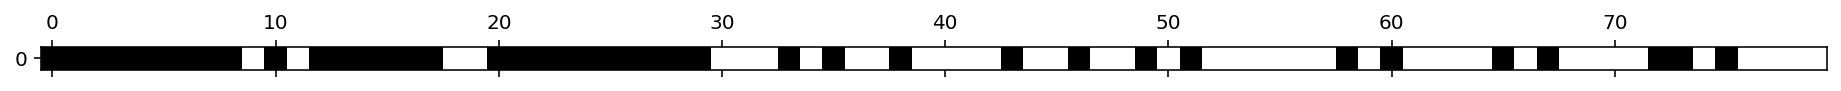

In [26]:
# 선택된 특성을 boolen 값으로 표시
# True는 검은색, False는 흰색으로 마스킹
mask = select.get_support() #특성중에 선택 된것만 True 로 표시 
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.yticks([0])
plt.show()

- 선택된 특성은 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거

전체 특성을 이용했을 때와 선택된 특성만 사용했을 때의 성능 비교

In [27]:
from sklearn.linear_model import LogisticRegression
train_x_select = select.transform(train_x)
# 테스트 데이터 변환
test_x_select = select.transform(test_x)
# 전체 특성을 사용한 점수
model = LogisticRegression() #solver = 'liblinear' 알고리즘 변경 
model.fit(train_x_select,train_y) #80개 특성 학습
# 선택된 일부 특성을 사용한 점수
model.score(train_x_select,train_y) ,model.score(test_x_select,test_y)

(0.9647887323943662, 0.9192982456140351)

In [28]:
model = LogisticRegression()
model.fit(train_x_select,train_y)

model.score(test_x_select,test_y)

0.9192982456140351

- 일부 원본 특성이 없더라도 노이즈 특성을 제거한 쪽의 성능이 더 높음
- 너무 많은 특성 때문에 모델을 만들기가 현실적으로 어려울 때 사용
- 많은 특성들이 확실히 도움이 안 된다고 생각될 때 사용

### 모델 기반 선택(model-based selection)

- 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 것만 선택

- 지도학습 모델은 최종적으로 사용할 학습 모델과 같을 필요는 없음

- 특성 선택을 위한 모델은 각 특성의 중요도를 측정하여 순서 매길 수 있어야 함

- 결정트리 기반의 모델들은 각 특성의 중요도를 feature_importances_에 저장

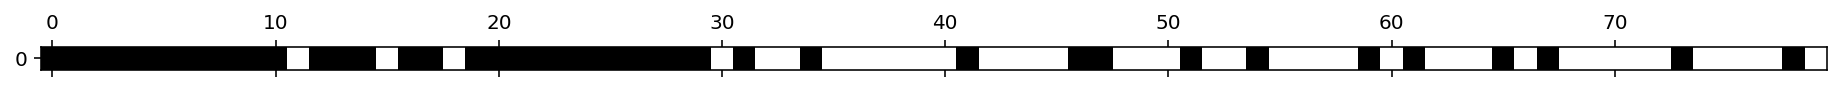

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# (지도 학습 모델로 계산된) 중요도가 지정한 임계치보다 큰 모든 특성 선택
# 일변량 분석으로 선택한 특성과 결과를 비교하기 위해 
# 절반 가량의 특성이 선택될수 있도록 중간값을 임계치로 사용
select  = SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                          threshold='median') #threshold = 임계값

select.fit(train_x,train_y)
#select.transform(train_x)

# 선택된 특성을 boolen 값으로 표시
# True는 검은색, False는 흰색으로 마스킹
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap = 'gray_r')
plt.yticks([0])
plt.show()

In [30]:
# 예측 성능 확인
train_l1 = select.transform(train_x)
test_l1 = select.transform(test_x)
model = LogisticRegression(solver = 'liblinear')
model.fit(train_l1,train_y)
model.score(test_l1,test_y)

0.9508771929824561

- 두 개를 제외한 모든 원본 특성이 선택 (특성을 40개 선택 -> 일부 노이즈도 선택) 



- 특성 선택이 더 잘 되었으므로 성능도 조금 향상

### 반복적 특성 선택(iterative selection)

- 특성의 수가 각기 다른 모델에서 만들어짐

- 방법

  1. 특성을 하나도 선택하지 않은 상태로 시작해 어떤 종료 조건을 도달할 때까지 하나씩 추가하는 방법
  2. 모든 특성을 가지고 시작해 어떤 종료 조건이 될 때까지 하나씩 제거하는 방법

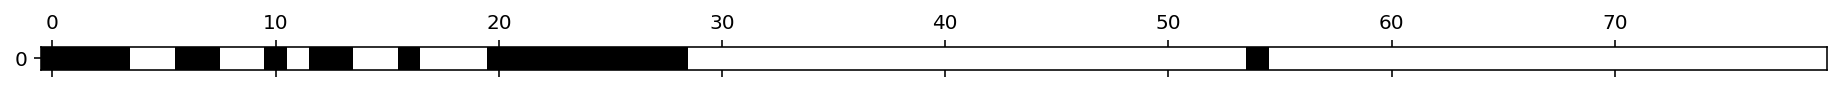

In [31]:
from sklearn.feature_selection import RFE

select = RFE(estimator=RandomForestClassifier(random_state = 0),n_features_to_select=20) #특성을 몇개 선택할것인지 고를수 있다.
select.fit(train_x,train_y)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap = 'gray_r')
plt.yticks([0])
plt.show()

- 이전 보다 특성 선택이 나아졌지만, 여전히 특성 한 개를 놓침
- 랜덤 포레스트 모델은 특성이 누락될 때마다 다시 학습하므로 40번이나 실행하여 모델 기반 선택보다 오래 걸림

In [32]:
# 예측 성능 확인
# 예측 성능 확인
train_x_ref = select.transform(train_x)
test_x_ref = select.transform(test_x)
model = LogisticRegression(solver = 'liblinear')
model.fit(train_x_ref , train_y)
model.score(test_x_ref,test_y)

0.9614035087719298

- 특성 선택이 제대로 되면 선형 모델의 성능은 랜덤 포레스트와 견줄만 함

## 전문가적 지식 활용

- 특성 공학은 특정 어플리케이션을 위해 전문가적 지식을 사용할 수 있는 중요한 영역
- 분야 전문가는 종종 초기 데이터에서 더 유용한 특성을 선택할 수 있도록 도움을 줄 수 있음

- 해당 분야에 내재된 사전 지식이 특성으로 추가될 수 있다면 머신러닝 알고리즘에 도움이 됨

## 특성 공학 실습 01 

시티바이크 데이터

- http://www.citibikenyc.com/system-data

- 문제 : 특정 날짜와 시간에 앤디 집 앞에 있는 자전거를 사람들이 얼마나 대여할 것인지 예측하는 것 
- 앤디가 빌릴 자전거가 남아 있을까?

차트 한글

```
# Windows
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
```
```
from matplotlib import rc
rc('font', family='Malgun Gothic')
```

In [33]:
# 2015년 8월 데이터 세 시간 간격 일일 주요 경향
import mglearn

citibike = mglearn.datasets.load_citibike()

citibike.head()


starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

In [34]:
xticks = pd.date_range(start=citibike.index.min(),end = citibike.index.max())#freq d = day ,m = month , h = hour,y = year 단위로 분석 

In [35]:
week = ['일','월','화','수','목','금','토']
tick_labels = [week[int(w)]+d for w,d in zip(xticks.strftime('%w'),xticks.strftime(' %m-%d'))]
#xticks.strftime(' %m-%d')

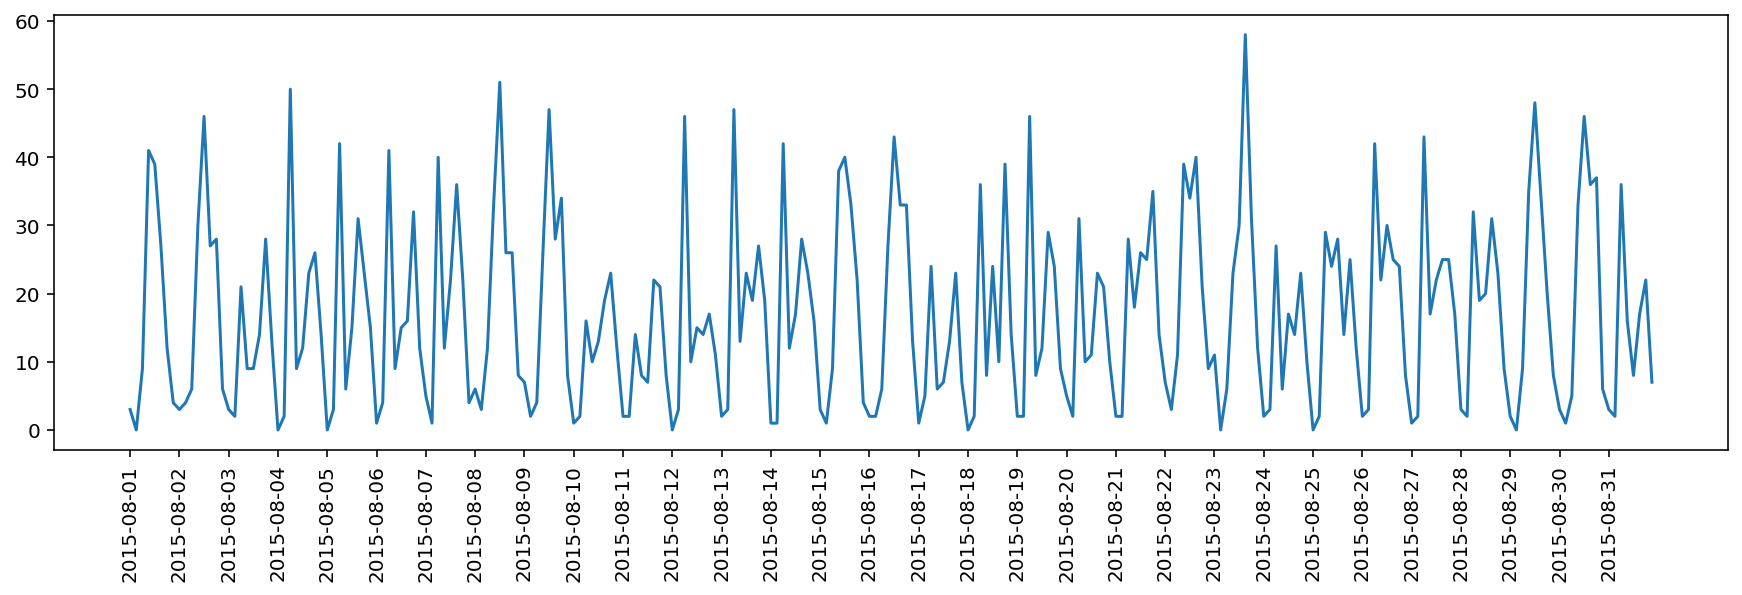

In [36]:
# 8월 한 달 동안의 대여 횟수
import pandas as pd
xticks = pd.date_range(start=citibike.index.min(),end = citibike.index.max())#freq d = day ,m = month , h = hour,y = year 단위로 분석 
week = ['Sun','Mon','Tue','Wen','Thr','Fri','Sat']
xticks_name = [week[int(w)]+d for w,d in zip(xticks.strftime('%w'),xticks.strftime(' %m-%d'))]

plt.figure(figsize = (15,4))
plt.plot(citibike)
plt.xticks(xticks,label = xticks_name,rotation = 90)
plt.show()

- 낮과 밤, 주중과 주말의 패턴 차이


#### 훈련 세트와 테스트 세트로 나누기

- 시계열 데이터를 이용한 예측 작업은 과거 데이터에서 학습하여 미래를 예측하는 방식
- 어떤 날짜를 기준으로 훈련 세트와 테스트 세트를 나눔 섞으면 안됌

In [37]:
# 3시간 누적 카운트 이므로 하루 24/3=8 개씩 23일 치는 184개 8일 치는 64개
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듬
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눔
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test))) 
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(x), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="train predict")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="test predict")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("date")
    plt.ylabel("rental number")

#### 첫 번째 시도는 날짜와 시간을 하나의 숫자로 표현한 특성을 사용

In [38]:
# 타깃값 추출 (대여 횟수)
y = citibike.values

# POSIX 시간 : 1970/1/1 00:00:00 부터 초로 나타냄
# POSIX 시간을 10**9로 나누어 변환
x = citibike.index.astype('int64').values.reshape(-1,1)//10**9




RandomForestRegressro 이용

- 데이터 전처리가 거의 필요하지 않아 처음 시도해보기 좋은 모델

테스트 세트 R^2: -0.04


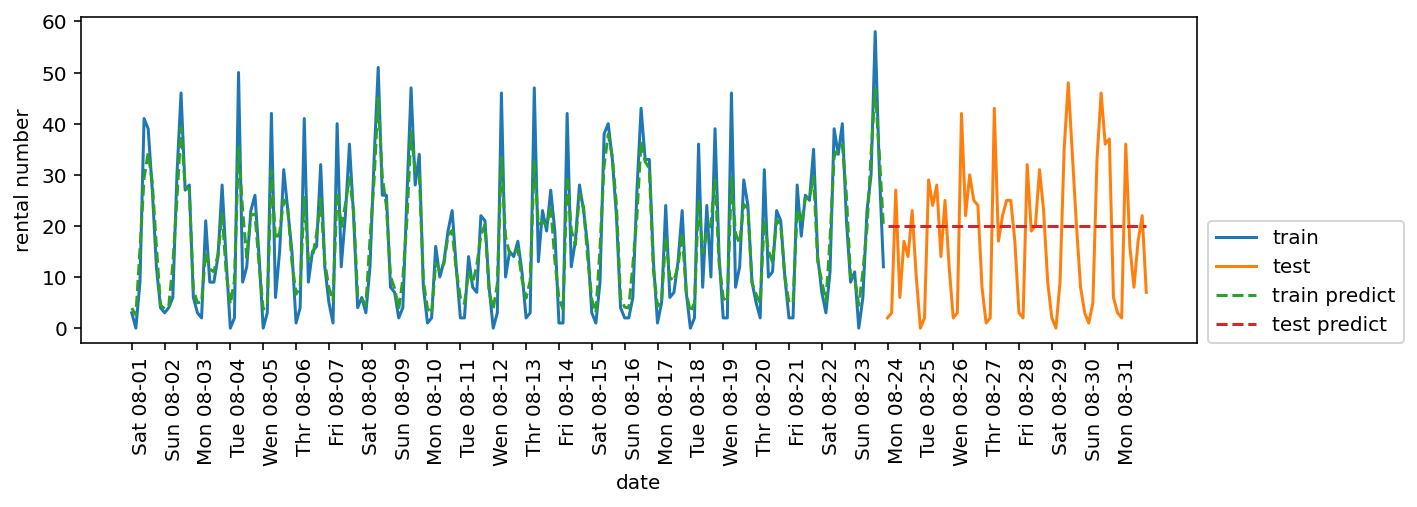

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
eval_on_features(x,y,model)

- 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 외샵(extrapolation)할 수 있는 능력이 없음
- 테스트 세트와 가장 가까이 있는 마지막 훈련 세트 데이터의 타깃값을 예측으로 사용

#### 두 번째 시도는 시간과 요일 특성을 추가

- 전문가적 지식 : 훈련 데이터의 대여 데이터를 시간과 요일 이라는 두 요소가 중요한 것으로 보임

In [40]:
citibike.index.hour.values

array([ 0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,
        3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,
        6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,
        9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9,
       12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12,
       15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15,
       18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18,
       21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,
        0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,
        3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,
        6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,
        9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9,
       12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12,
       15, 18, 21,  0,  3

테스트 세트 R^2: 0.60


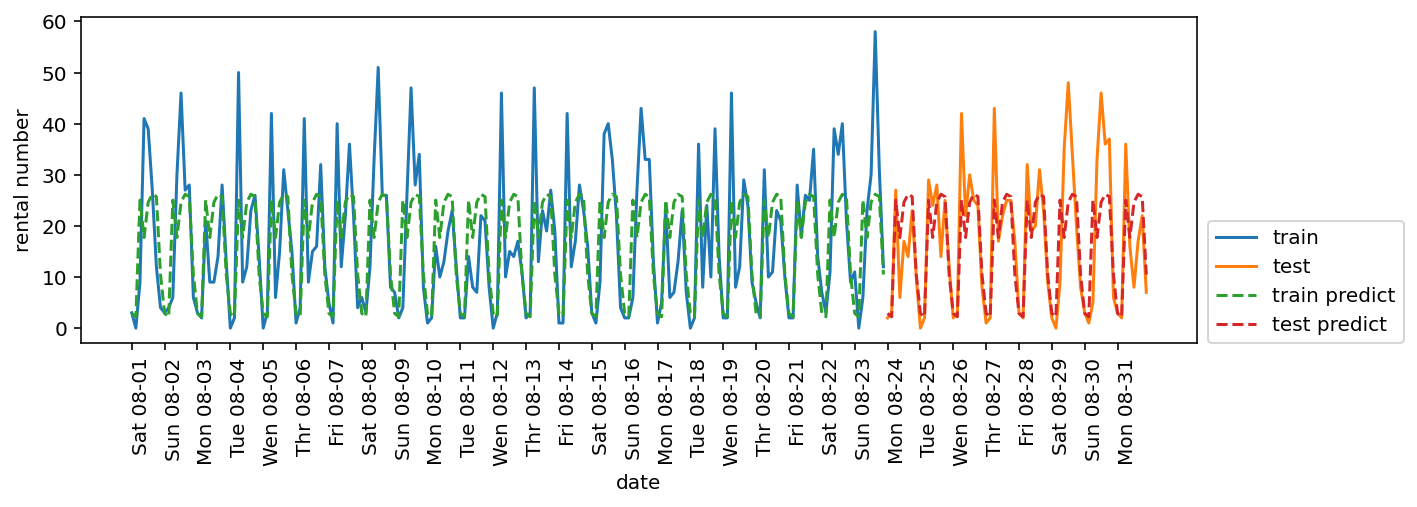

In [41]:
# 시간 정보 추가
hour_x = citibike.index.hour.values.reshape(-1,1)
eval_on_features(hour_x,y,model)

테스트 세트 R^2: 0.02


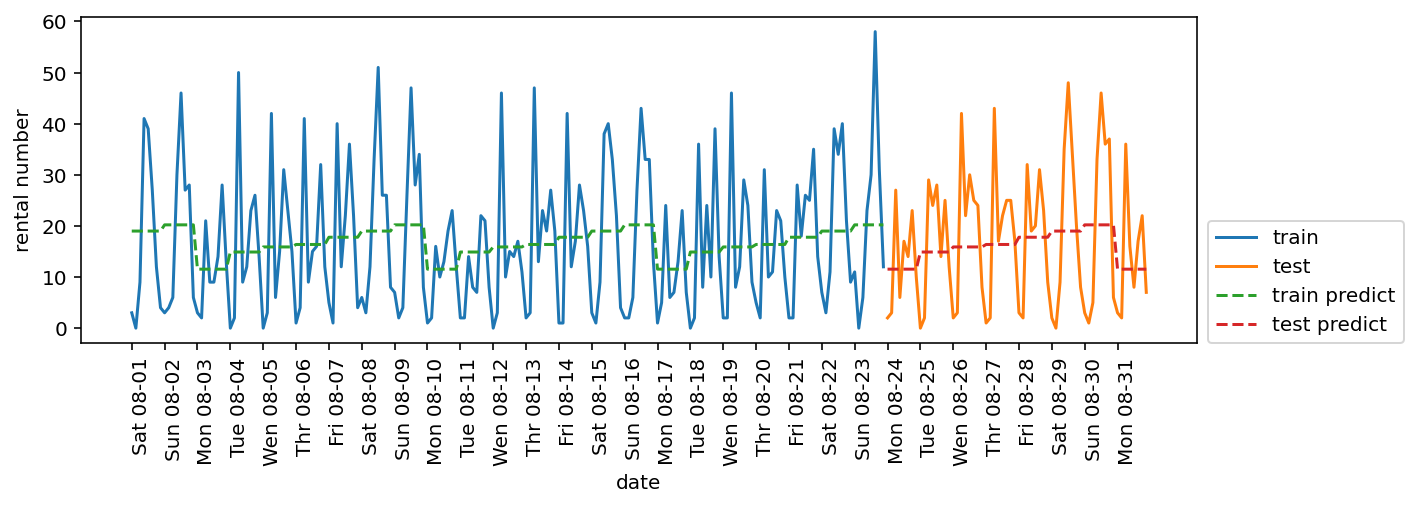

In [42]:
# 요일 정보도 추가
week_x = citibike.index.dayofweek.values.reshape(-1,1)
eval_on_features(week_x , y,model)

In [45]:
hour_week_x

array([[ 5,  0],
       [ 5,  3],
       [ 5,  6],
       [ 5,  9],
       [ 5, 12],
       [ 5, 15],
       [ 5, 18],
       [ 5, 21],
       [ 6,  0],
       [ 6,  3],
       [ 6,  6],
       [ 6,  9],
       [ 6, 12],
       [ 6, 15],
       [ 6, 18],
       [ 6, 21],
       [ 0,  0],
       [ 0,  3],
       [ 0,  6],
       [ 0,  9],
       [ 0, 12],
       [ 0, 15],
       [ 0, 18],
       [ 0, 21],
       [ 1,  0],
       [ 1,  3],
       [ 1,  6],
       [ 1,  9],
       [ 1, 12],
       [ 1, 15],
       [ 1, 18],
       [ 1, 21],
       [ 2,  0],
       [ 2,  3],
       [ 2,  6],
       [ 2,  9],
       [ 2, 12],
       [ 2, 15],
       [ 2, 18],
       [ 2, 21],
       [ 3,  0],
       [ 3,  3],
       [ 3,  6],
       [ 3,  9],
       [ 3, 12],
       [ 3, 15],
       [ 3, 18],
       [ 3, 21],
       [ 4,  0],
       [ 4,  3],
       [ 4,  6],
       [ 4,  9],
       [ 4, 12],
       [ 4, 15],
       [ 4, 18],
       [ 4, 21],
       [ 5,  0],
       [ 5,  3],
       [ 5,  6

테스트 세트 R^2: 0.84


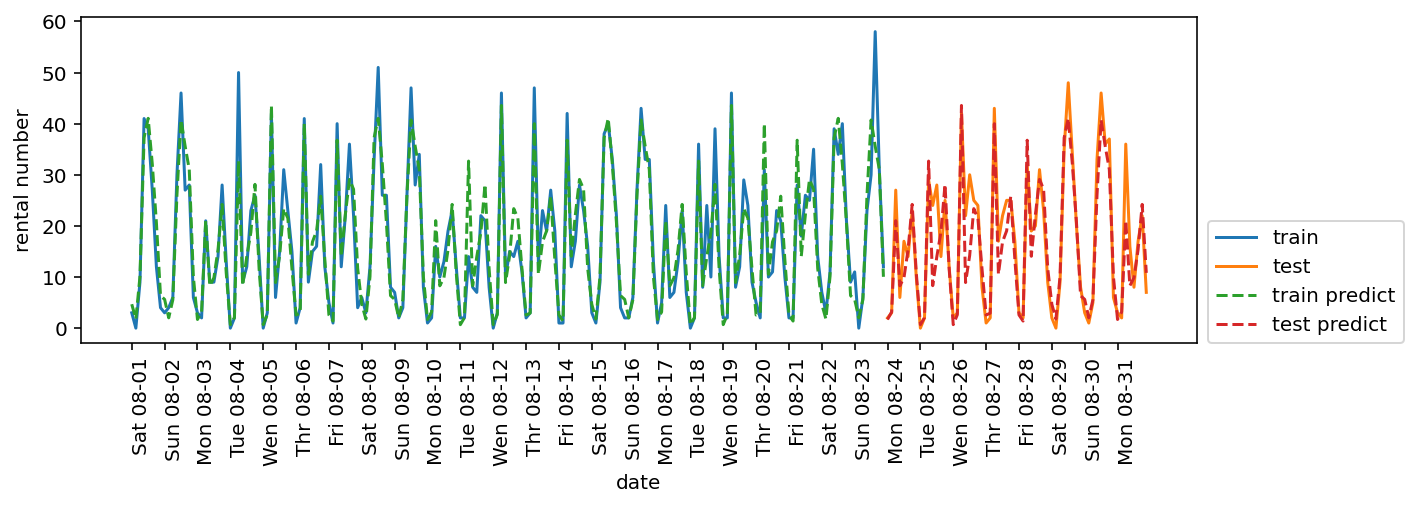

In [44]:
hour_week_x = np.hstack([week_x,hour_x])
eval_on_features(hour_week_x,y,model)

테스트 세트 R^2: 0.13


'\n하루를 8개로 구분한 데이터 \n0 ,3 ,6, 9, .....21 연속형 데이터로 보면 값이 큰게 더 잘나온다. \n'

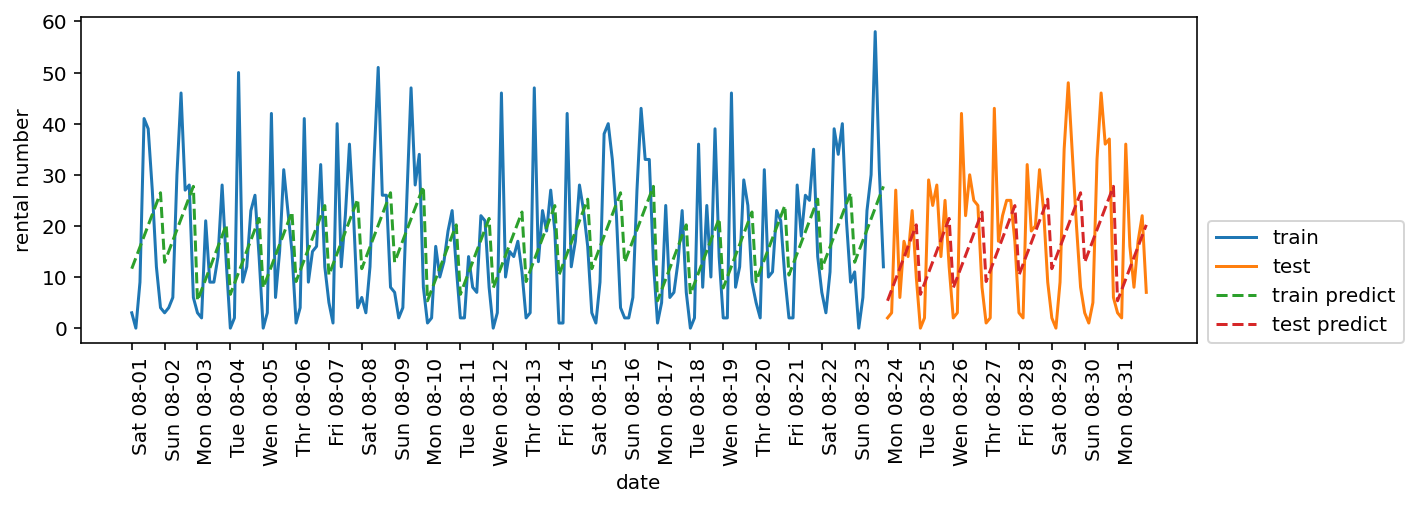

In [46]:
# LinearRegression 을 적용
# 굳이 랜덤 포레스트같이 복잡한 모델이 필요하지 않음
from sklearn.linear_model import LinearRegression
model = LinearRegression()
eval_on_features(hour_week_x,y,LinearRegression()) #0 에서 시작해서 21 에서 끝난다 
'''
하루를 8개로 구분한 데이터 
0 ,3 ,6, 9, .....21 연속형 데이터로 보면 값이 큰게 더 잘나온다. 
'''

- 성능 나쁘고 주기 패턴 이상 이유
 - 요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로 해석되기 때문
 - 하루에서 시간이 흐를 수록 대여수가 늘어나게 학습되어 있음
 - 하지만 실제 패턴 이보다 복잡 

- 이 패턴을 잡아내기 위해 OneHotEncoder를 사용하여 정수형을 범주형 변수로 해석

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
hour_week_x_oh = encoder.fit_transform(hour_week_x).toarray()
hour_week_x_oh.shape

'''
하루는 8개의 시간  / 요일 일 ~~ 토 : 7일 해서 특성이 15개
'''

'\n하루는 8개의 시간  / 요일 일 ~~ 토 : 7일 해서 특성이 15개\n'

Ridge 이용

테스트 세트 R^2: 0.62


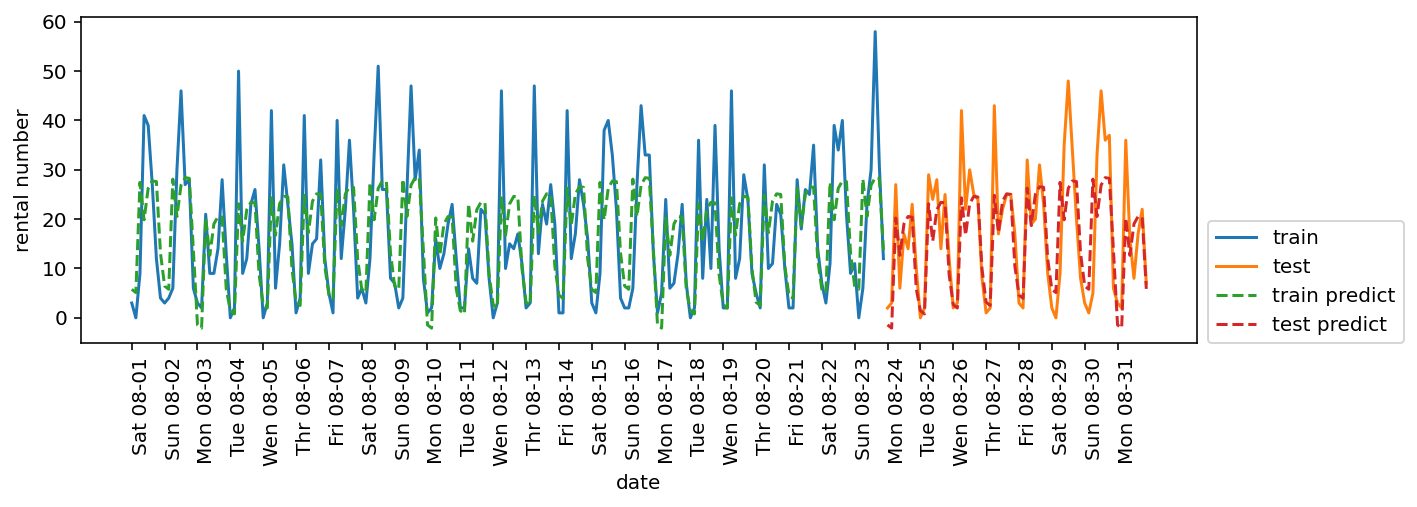

In [49]:
from sklearn.linear_model import Ridge
model = Ridge()
eval_on_features(hour_week_x_oh,y,model)

- 연속형 특성일 때보다 훨씬 좋아짐

 - 이 선형 모델은 요일에 대해 하나의 계수를 학습
 - 시간에 대해서도 하나의 계수 학습
 - 시간 패턴이 모든 날에 걸쳐 공유된다는 뜻

- 상호작용 특성을 사용하면 시간과 요일 조합별 계수를 학습 가능

In [50]:
# 상호작용 특성 추가
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2,interaction_only=True,include_bias=False)
hour_week_x_oh_poly = poly.fit_transform(hour_week_x_oh)
hour_week_x_oh_poly.shape

(248, 120)

- 이 모델 가장 큰 장점 : 무엇이 학습되었는지 명확 

- 각 날짜와 시간에 대해 하나의 계수를 학습 

- 랜덤 포레스트와는 달리 이 모델이 학습한 계수를 그래프로 나타낼수 있음

테스트 세트 R^2: 0.85


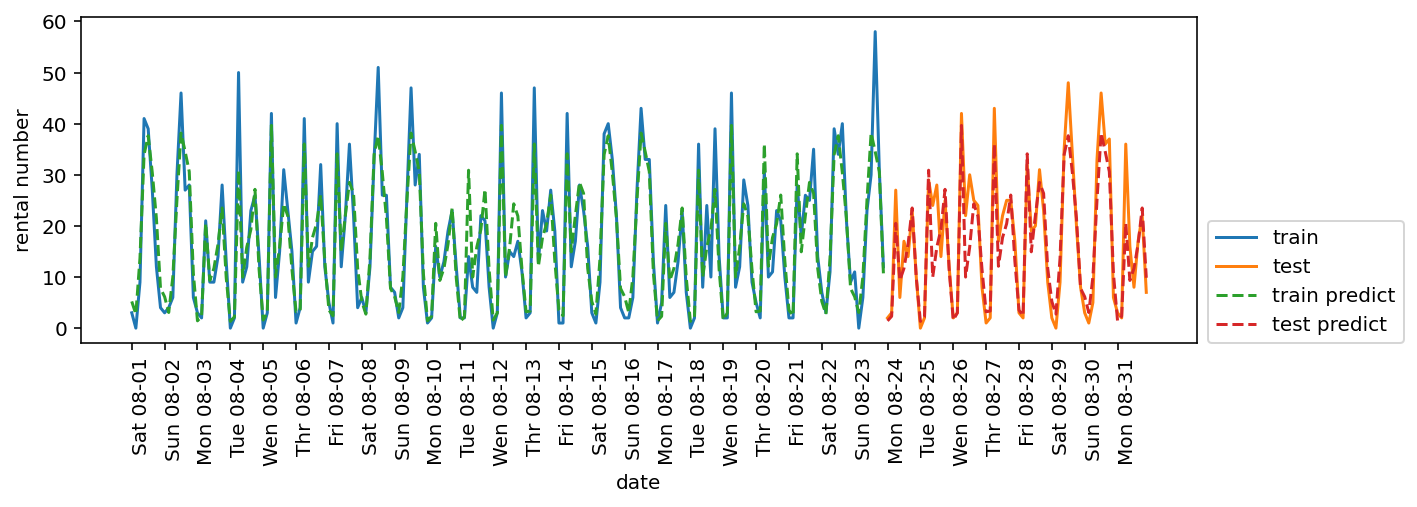

In [51]:
lr = Ridge()
eval_on_features(hour_week_x_oh_poly,y,lr)

In [52]:
# 시간과 요일 특성의 이름


In [53]:
# 추출한 모든 상호작용 특성에 이름을 부여
# 계수가 0이 아닌 특성만 선택


In [54]:
# 시간과 요일의 곱을 사용한 선형 모델의 계수

## 특성 공학 실습 02

캐글 주택 가격

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

- 문제 : 주택 판매 가격 예측 


### 데이터 사전 처리(Preprocessing)

In [55]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(drive_path + 'house_price.csv')


df2 = df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis = 1)


df2.dropna(inplace=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

In [56]:
df2.shape

(1094, 76)

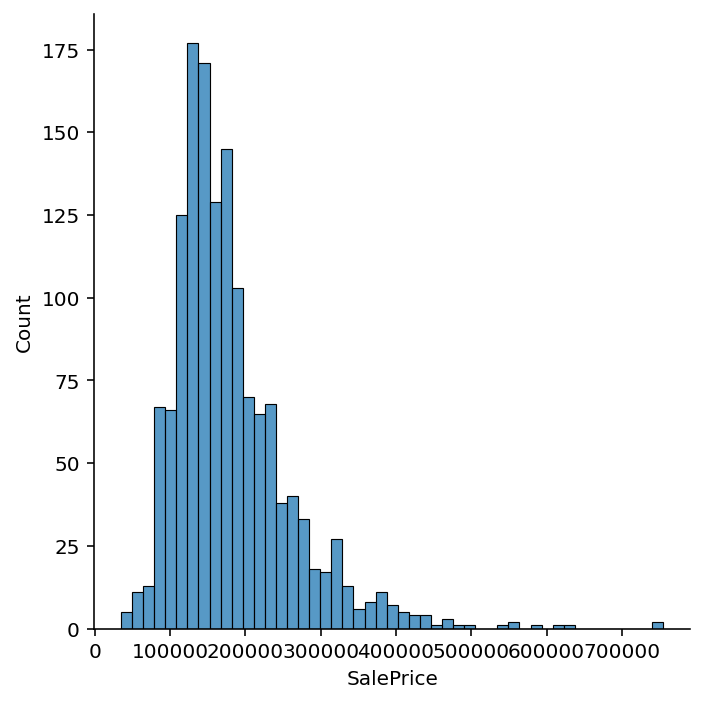

In [57]:
#y값의 분포 확인 
sns.displot(df['SalePrice'])

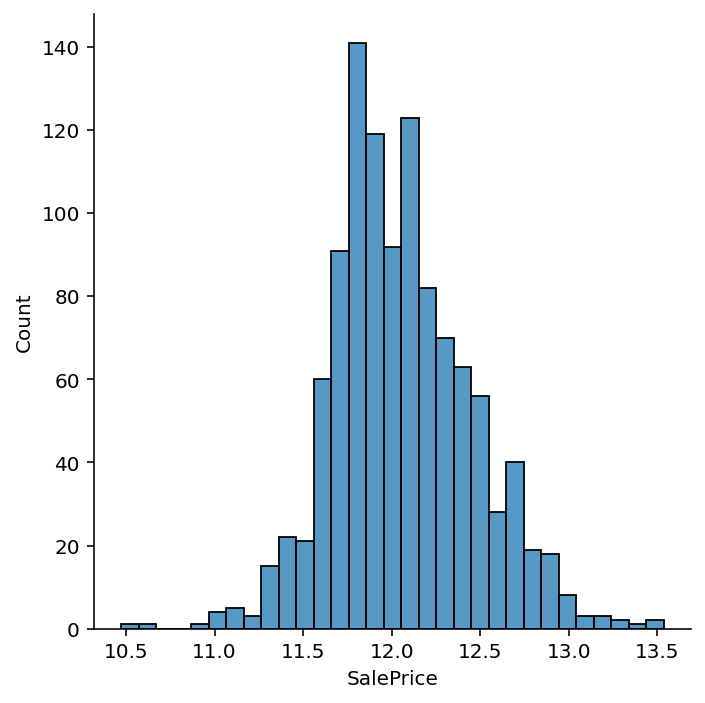

In [58]:
#np.log1p() #로그 가 inf 되는것을 방지 
sns.displot(np.log1p(df2['SalePrice']))

In [59]:
df2['SalePrice'] = np.log1p(df2['SalePrice'])

In [60]:
df2['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1094, dtype: float64

In [61]:
df.describe() #평균갑이랑 중간값 을 비교하는것이 핵심 !!! 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [62]:
#연속형 특성의 결측 처리
df.fillna(df.mean, inplace = True)

df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis = 1,inplace=True)

### 선형 회귀 모델의 학습/예측/평가

In [80]:
def get_rmse(model):
    pred = model.predict(test_x)
    mse = mean_squared_error(test_y , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [77]:
categorical_feature = df.dtypes[df.dtypes == "object"].index
print(categorical_feature, len(categorical_feature))


Index(['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object') 41


In [78]:
'''
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
hour_week_x_oh = encoder.fit_transform(hour_week_x).toarray()
hour_week_x_oh.shape
'''
df2 =pd.get_dummies(df2)
df2.shape
#df2 = pd.get_dummies(df2 , columns = '')

(1094, 261)

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

x  = df2.iloc[:,:-1]
y = df2.iloc[:,-1:]

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 42)

model_LR = LinearRegression().fit(train_x,train_y)
model_LR.score(train_x,train_y),model_LR.score(test_x,test_y)




model_L = Lasso(alpha=0.001,max_iter = 10000).fit(train_x,train_y)
model_L.score(train_x,train_y),model_L.score(test_x,test_y)

model_RF = RandomForestRegressor(random_state=0).fit(train_x,train_y)
model_RF.score(train_x,train_y),model_RF.score(test_x,test_y)

model_R = Ridge(max_iter = 100).fit(train_x,train_y)
model_R.score(train_x,train_y),model_R.score(test_x,test_y)


(0.9925284376840463, 0.9753265484781964)

In [83]:
get_rmses([model_LR,model_R,model_L,model_RF])

LinearRegression 로그 변환된 RMSE: 0.0
Ridge 로그 변환된 RMSE: 0.048
Lasso 로그 변환된 RMSE: 0.058
RandomForestRegressor 로그 변환된 RMSE: 0.062


[3.712217208774529e-12,
 0.04757852340074156,
 0.058135785684102874,
 0.06163525865516467]

In [84]:
from sklearn.model_selection import cross_val_score

# 분할하지 않고 전체 데이터로 cross_val_score( ) 수행
# 모델별 CV RMSE값과 평균 RMSE 출력
def get_avg_rmse_cv(models):
    pass


In [85]:
# lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [model_LR,model_R,model_L,model_RF]
for model in models:
  mse_list = -cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv = 5)

  rmse_list = np.sqrt(mse_list)
  rmse_avg = rmse_list.mean()

  print(f'{model.__class__.__name__} CV Rmse list:{np.round(rmse_list,3)}')
  print(f'{model.__class__.__name__} CV Rmse avg:{np.round(rmse_avg,3)}')


LinearRegression CV Rmse list:[0.    0.068 0.    0.    0.   ]
LinearRegression CV Rmse avg:0.014
Ridge CV Rmse list:[0.054 0.039 0.049 0.047 0.022]
Ridge CV Rmse avg:0.042
Lasso CV Rmse list:[0.066 0.027 0.065 0.065 0.012]
Lasso CV Rmse avg:0.047
RandomForestRegressor CV Rmse list:[0.073 0.03  0.068 0.074 0.028]
RandomForestRegressor CV Rmse avg:0.054


* 하이퍼 파라미터 튜닝

In [87]:
def print_best_param(model,params):
  grid_search = GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv = 5)
  grid_search.fit(x,y)
  rmse = np.sqrt(-1*grid_search.best_score_)
  print(f'{model.__class__.__name__} CV RMSE AVG: {rmse:.3f},'
   f'Params: {grid_search.best_params_}')
  return grid_search.best_estimator_

In [88]:
from sklearn.model_selection import GridSearchCV

param_ridge = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
param_lasso = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
print_best_param(model_R,param_ridge)
print_best_param(model_L,param_lasso)

Ridge CV RMSE AVG: 0.029,Params: {'alpha': 0.05}
Lasso CV RMSE AVG: 0.052,Params: {'alpha': 0.001}


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
# 최적화 alpha값으로 학습, 예측 및 평가 수행. 
model = Ridge(alpha = 0.05 ,max_iter = 1000)

model.fit(train_x,train_y)
model.score(train_x,train_y),model.score(test_x,test_y)


(0.9995558445536681, 0.9981759721248998)

In [93]:
model = Lasso(alpha = 0.001).fit(train_x,train_y)
model.score(train_x,train_y),model.score(test_x,test_y)

(0.9781932594791899, 0.9631620817696056)

* 데이터 왜곡 로그 변환 후 성능 평가

In [90]:
from scipy.stats import skew

feature_index = df2.dtypes[df2.dtypes != 'object'].index
feature_index
skew_feature = df2[feature_index].apply(lambda x:skew(x))
skew_feature_top= skew_feature[skew_feature > 1].sort_values(ascending = False)
skew_feature[skew_feature > 1].sort_values(ascending = False) #1 보다 큰애들만 중요 

Exterior1st_CBlock    33.030303
HeatingQC_Po          33.030303
Condition1_RRNe       33.030303
RoofMatl_ClyTile      33.030303
RoofMatl_Membran      33.030303
                        ...    
RoofStyle_Hip          1.422226
1stFlrSF               1.369647
GarageFinish_Fin       1.140691
HeatingQC_TA           1.022503
LotShape_IR1           1.007037
Length: 196, dtype: float64

In [94]:
df2[skew_feature_top.index] = np.log1p(df2[skew_feature_top.index])

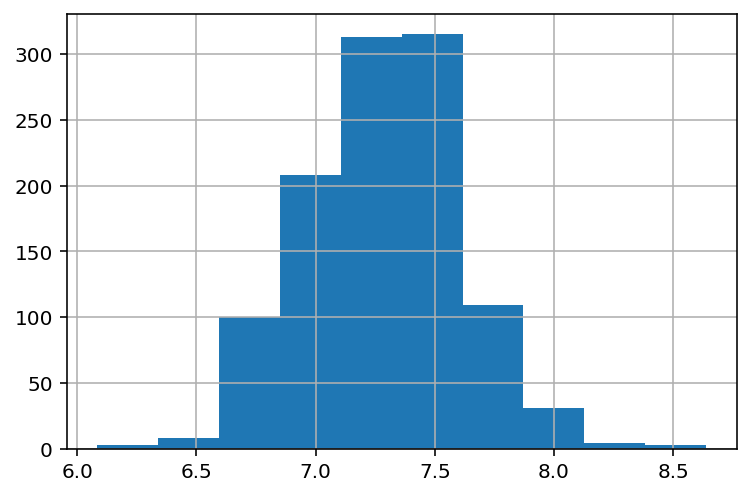

In [95]:
df2['GrLivArea'].hist()

* 이상치 제거

In [96]:

df2 =pd.get_dummies(df2)
df2.shape

x  = df2.iloc[:,:-1]
y = df2.iloc[:,-1:]

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 42)

model_LR = LinearRegression().fit(train_x,train_y)
print(model_LR.score(train_x,train_y),model_LR.score(test_x,test_y)) 


model_R = Ridge(max_iter = 100).fit(train_x,train_y)
print(model_R.score(train_x,train_y),model_R.score(test_x,test_y))

model_L = Lasso(alpha=0.001,max_iter = 10000).fit(train_x,train_y)
print(model_L.score(train_x,train_y),model_L.score(test_x,test_y))

model_RF = RandomForestRegressor(random_state=0).fit(train_x,train_y)
print(model_RF.score(train_x,train_y),model_RF.score(test_x,test_y))

get_rmse(model)
get_rmses([model_LR,model_R,model_L,model_RF])

1.0 1.0
0.9901901217606434 0.9712583743887245
0.9759165868959304 0.9620434940181948
0.9960284900284901 0.9585936991869919
Lasso 로그 변환된 RMSE: 0.042
LinearRegression 로그 변환된 RMSE: 0.0
Ridge 로그 변환된 RMSE: 0.036
Lasso 로그 변환된 RMSE: 0.041
RandomForestRegressor 로그 변환된 RMSE: 0.043


[7.637679862640886e-14,
 0.035594027482507735,
 0.04090388711255543,
 0.04272230575991036]

##이상치 제거


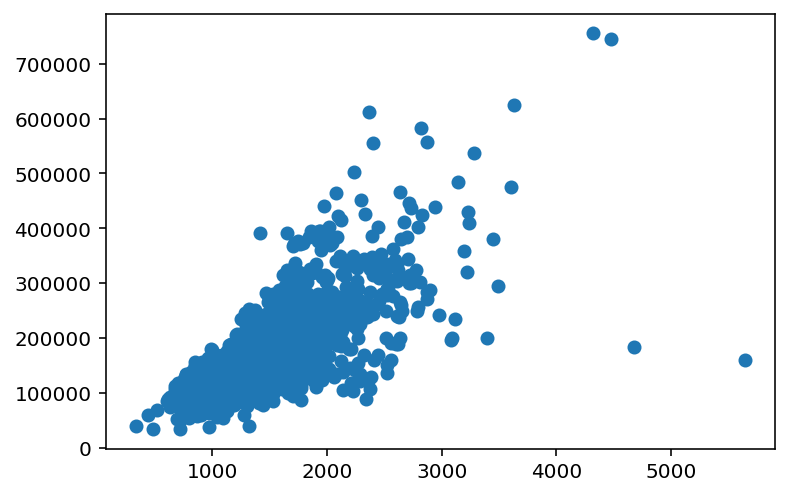

In [103]:
import matplotlib.pyplot as plt

df_org = pd.read_csv(drive_path+'house_price.csv')


plt.scatter(df_org['GrLivArea'],df_org['SalePrice'])

In [ ]:
df_oh = 

In [111]:
con1 = df2['GrLivArea'] > np.log1p(4000)
con2 = df2['SalePrice'] < 500000

outlier_index = df2[con1&con2].index
df2.drop(outlier_index , axis = 0,inplace=True)
df2.shape

(1090, 261)

In [112]:
param_ridge = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
param_lasso = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
print_best_param(model_R,param_ridge)
print_best_param(model_L,param_lasso)

Ridge CV RMSE AVG: 0.021,Params: {'alpha': 0.05}
Lasso CV RMSE AVG: 0.037,Params: {'alpha': 0.001}


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### 회귀 트리 학습/예측/평가 

In [117]:
from xgboost import XGBRegressor
model_XGB = XGBRegressor().fit(train_x,train_y)
model_XGB.score(train_x,train_y)

[00:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9999079556861081

In [98]:
from lightgbm import LGBMRegressor


### 회귀 모델들의 예측 결과 혼합을 통한 최종 예측

In [115]:
pred_ridge = model_R.predict(test_x)
pred_lasso = model_L.predict(test_x)

pred = (0.6 * pred_ridge) + (0.4 * pred_lasso)

In [116]:
rmse = np.sqrt(mean_squared_error(test_y,pred))
rmse

ValueError: ignored